# Comparación de las métricas para las diferentes alternativas

Dadas las diferente alternativas estudiadas, se ha planteado una parametrización del algoritmo de generación de las bases de datos sobre las que se realiza la clasificación de los vasos sanguíneos.

## Parametría empleada

In [1]:
import PARAMETERS

"""
LBP_METHOD
----------
Defines the LBP algorithm version to be used.
· default: LBP original version [https://medium.com/@rajatanantharam/local-binary-patterns-8807ecf7f87c].
· riu: Rotation invariant version [https://www.researchgate.net/publication/221303862_Gray_Scale_and_Rotation_Invariant_Texture_Classification_with_Local_Binary_Patterns].
· riu2: Improved rotation invariance with uniform patterns [https://www.researchgate.net/publication/221303862_Gray_Scale_and_Rotation_Invariant_Texture_Classification_with_Local_Binary_Patterns].
"""  # noqa
PARAMETERS.LBP_METHOD = 'riu2'

"""
METHOD
------
Defines the dataset structure.
· get_pyramid_dataset: Generate a single dataset in which each variable is a scale of the original image. Therefore, a single classifier is used.
· get_datasets_by_scale: Generate a dataset for each scale. Therefore, a different classifier is applied for scale.
"""  # noqa
PARAMETERS.METHOD = 'get_pyramid_dataset'

"""
INTERPOLATION_ALGORITHM
-----------------------
Defines the interpolation algorithm to be used in the image rescaling process.
· nearest: Pick one nearest pixel from the input image. Ignore all other input pixels.
· bicubic: Cubic interpolation on all pixels that may contribute to the output value.
· lanczos: Calculate the output pixel value using a high-quality Lanczos filter.
"""
PARAMETERS.INTERPOLATION_ALGORITHM = 'nearest'

"""
BALANCE    <- ONLY for get_pyramid_dataset
-------
Whether to remove data from the train set in order to equalize the proportion of instances of each label.
· True
· False
"""
PARAMETERS.BALANCE = False

"""
N_SCALES
--------
Number of scales to use.
1 - 6
"""
PARAMETERS.N_SCALES = 6

"""
GRAY_INTENSITY    <- ONLY for get_pyramid_dataset
--------------
Whether to add a variable with the intensity of each pixel in the gray scale image.
· True
· False
"""
PARAMETERS.GRAY_INTENSITY = True

"""
X2SCALE
-------
Whether to add a scale with x2 resolution.
· True
· False
"""
PARAMETERS.X2SCALE = False


PARAMETERS.ENCODING = 'categorical'


# Other parameters
PARAMETERS.PLOT = False
PARAMETERS.PLOT_LBP_LABEL = False
PARAMETERS.N_JOBS = 1
PARAMETERS.HEIGHT = 608
PARAMETERS.WIDTH = 576
PARAMETERS.FILE_EXTENSION = f"{PARAMETERS.LBP_METHOD}_{PARAMETERS.METHOD}_{PARAMETERS.INTERPOLATION_ALGORITHM}_balance-{PARAMETERS.BALANCE}_scales-{PARAMETERS.N_SCALES}_x2-{PARAMETERS.X2SCALE}_gray-intensity-{PARAMETERS.GRAY_INTENSITY}"

### Algoritmo de interpolación

A continuación se va muestra el resultado gráfico proporcionado por la aplicación de diferentes algoritmos de interpolación en el reescalado de las imágenes. Se aplica así mismo al gold standard con la finalidad de visualizar el efecto de la transformación a menores dimensiones.

En primer lugar se aplica una configuración inicial al algoritmo de generación de las bases de datos para que muestre los resultados esperados.

In [2]:
from create_db import main
%matplotlib inline

# Plot the LBP transformation result with the label
PARAMETERS.PLOT_LBP_LABEL = True
# Individual configuration for each scale
PARAMETERS.METHOD = 'get_datasets_by_scale'
# Scales
PARAMETERS.N_SCALES = 6

#### Nearest neighbor

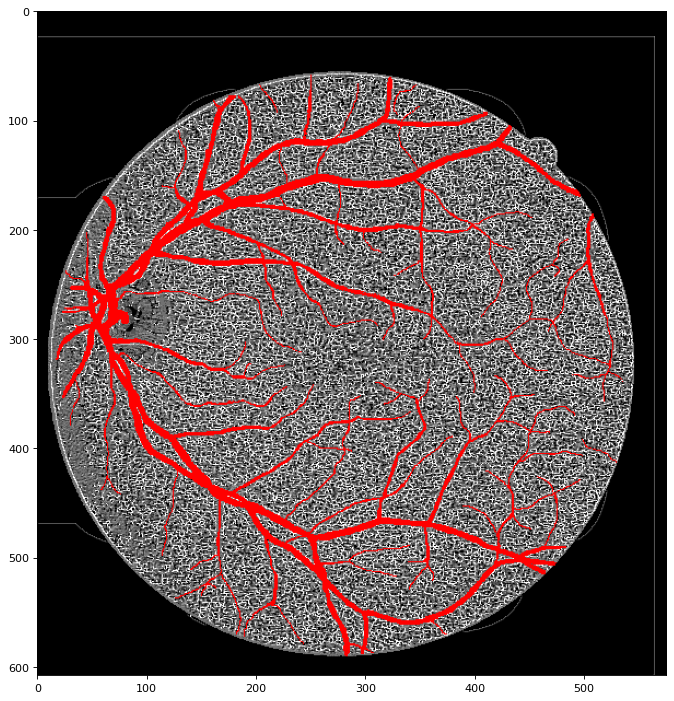

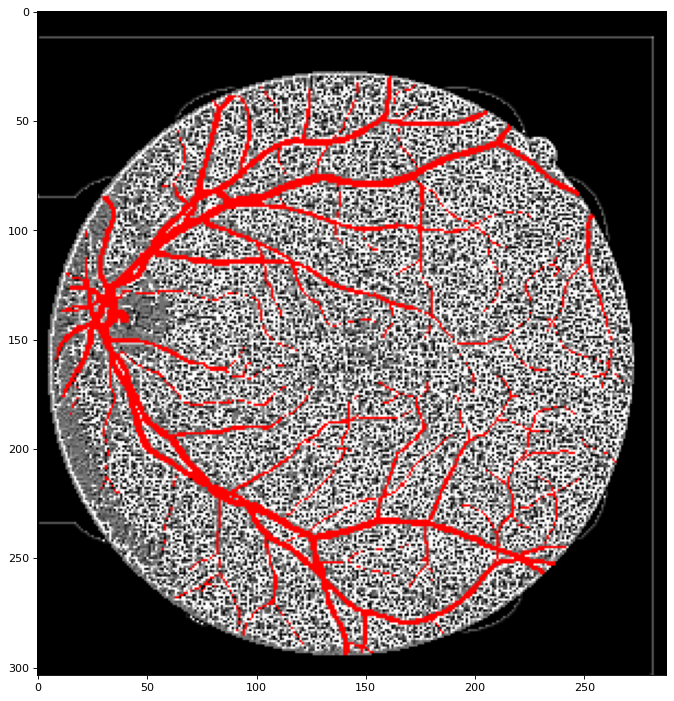

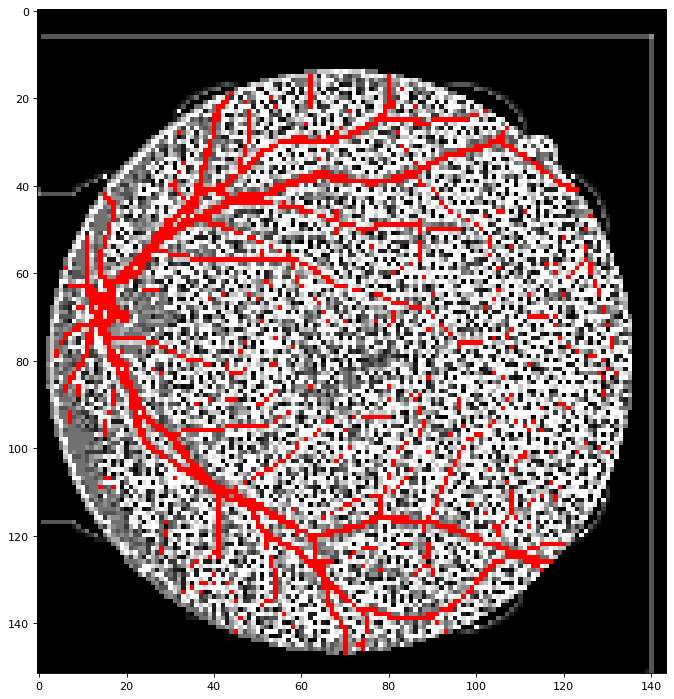

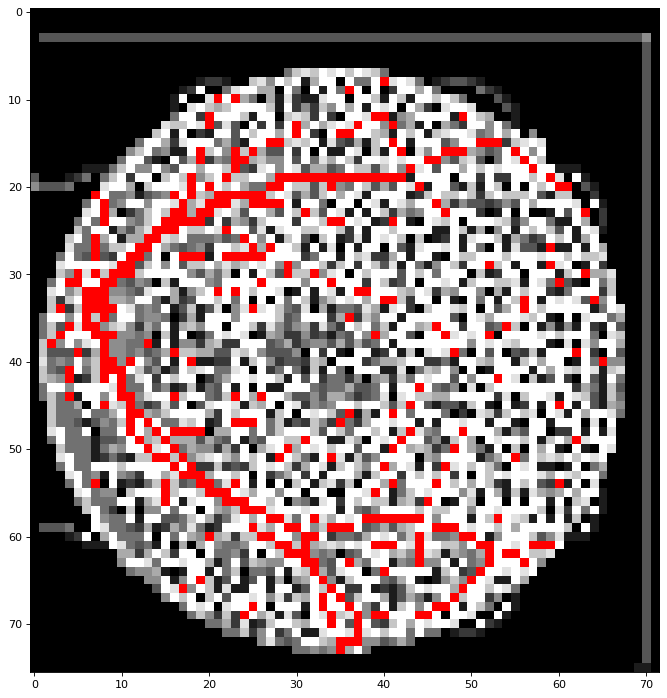

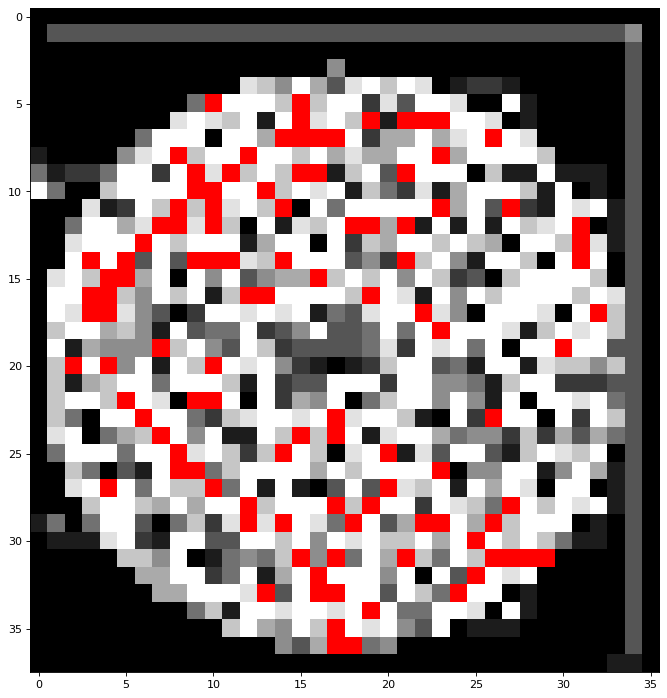

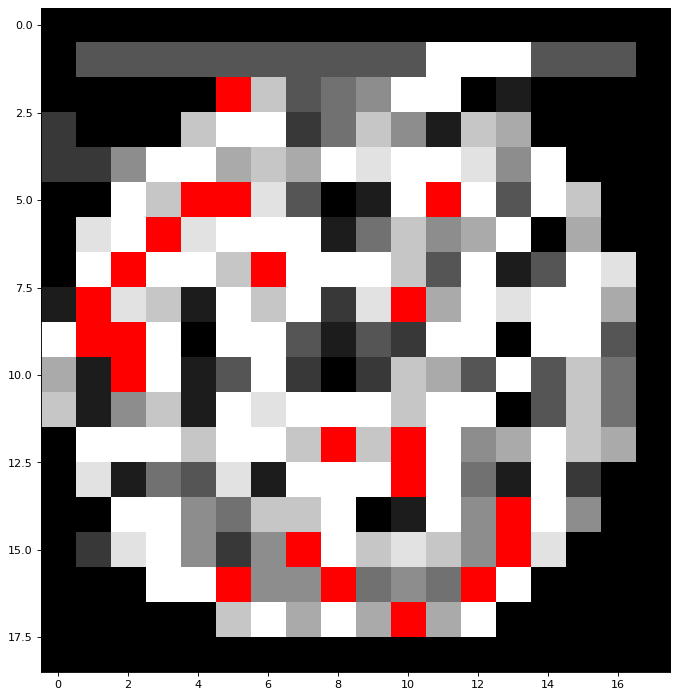

In [3]:
# Algorithm
import os
os.environ['SKIP_VALIDATION'] = 'True'

PARAMETERS.INTERPOLATION_ALGORITHM = 'nearest'

#print(VALID_PARAMETERS)

# Execution for the first image
main(single_exec=True)

#### Bicubic

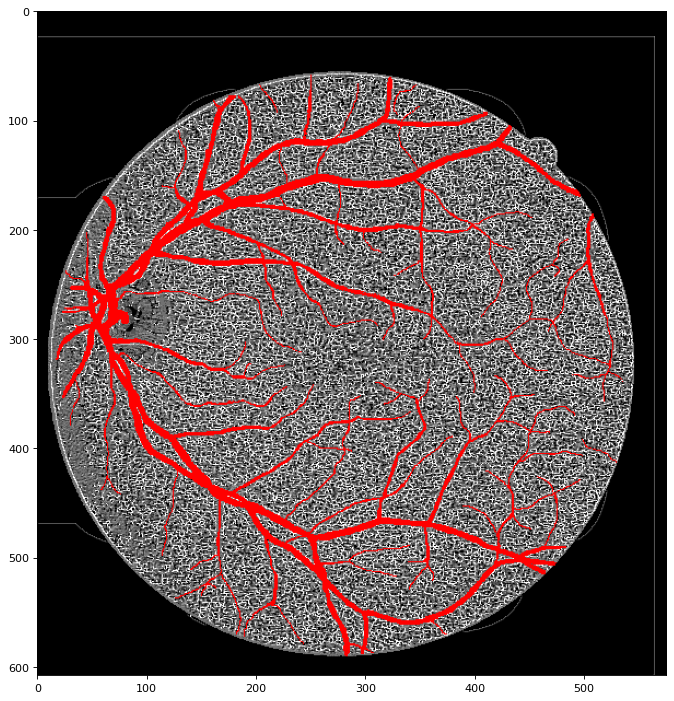

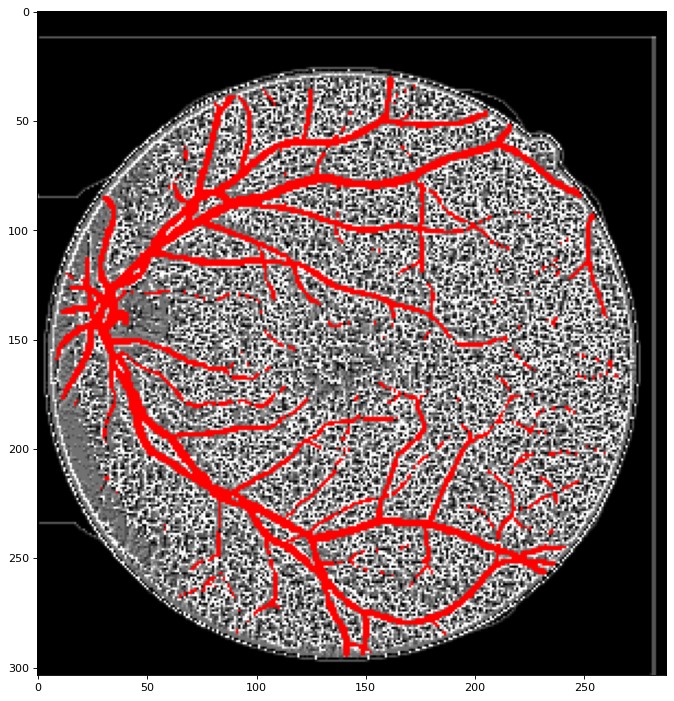

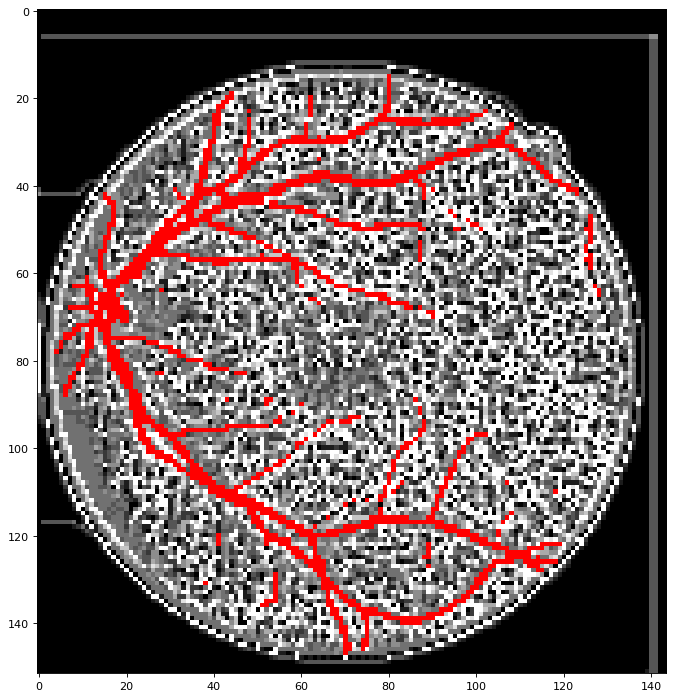

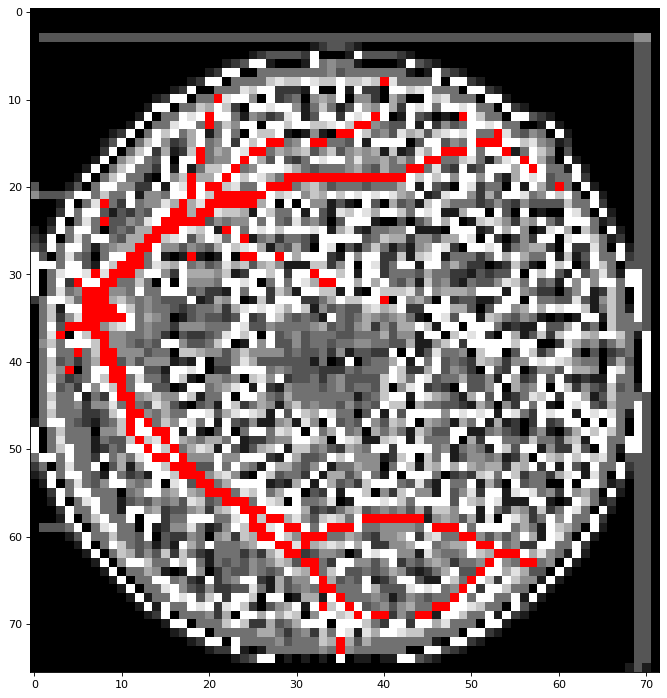

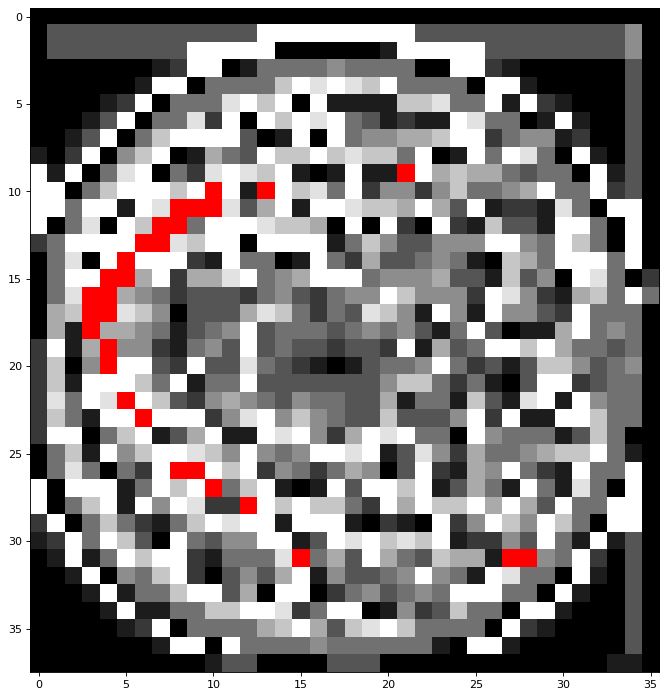

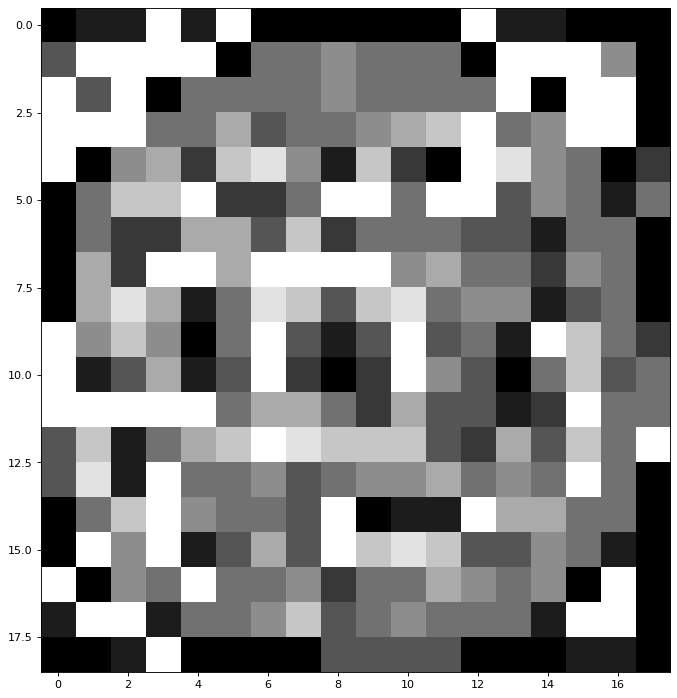

In [4]:
# Algorithm
PARAMETERS.INTERPOLATION_ALGORITHM = 'bicubic'

# Execution for the first image
main(single_exec=True)

#### Lanczos

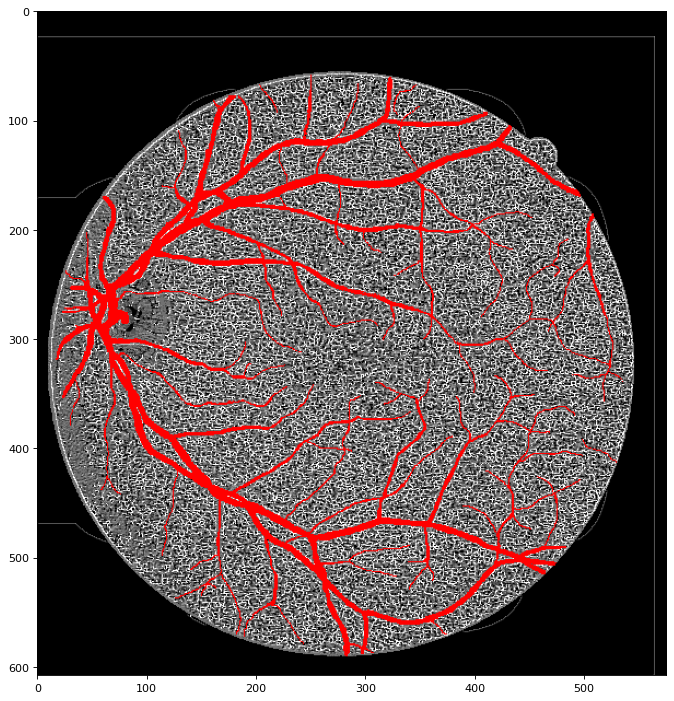

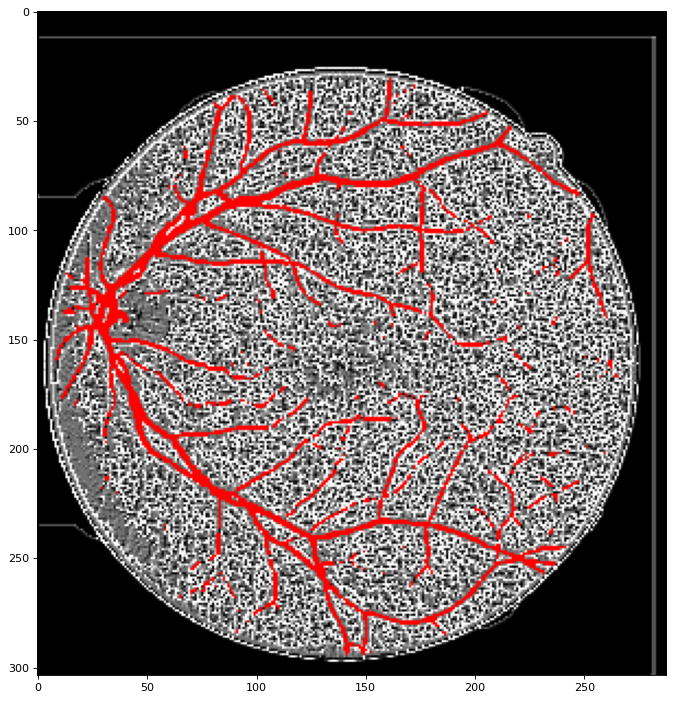

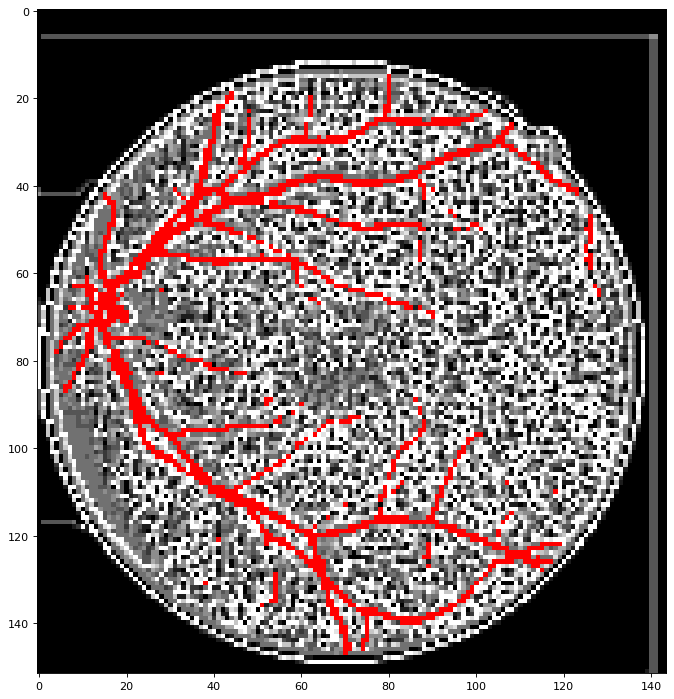

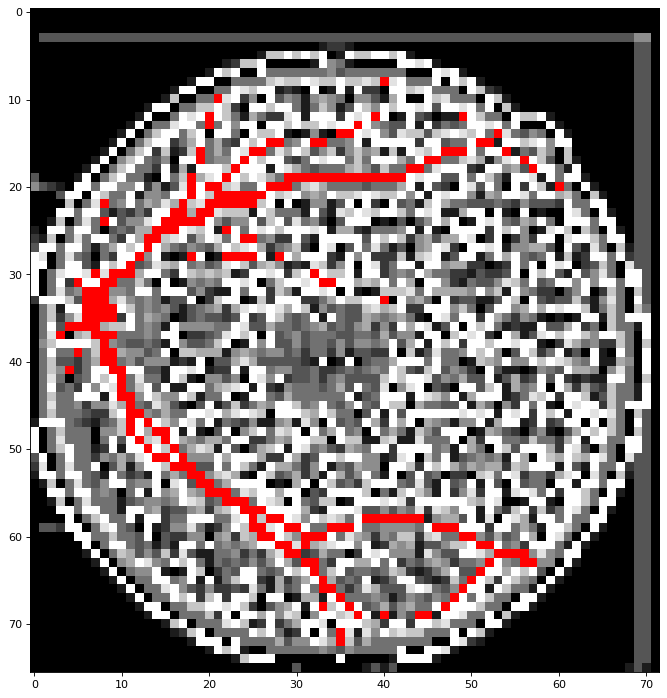

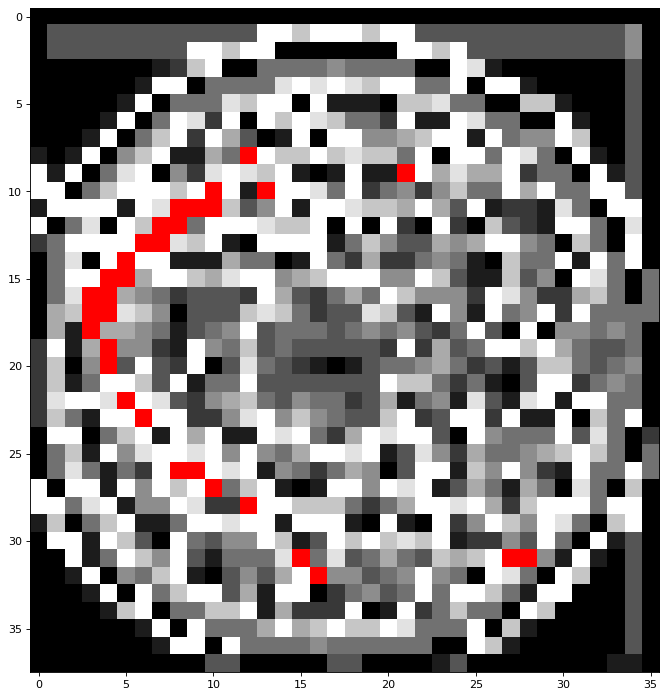

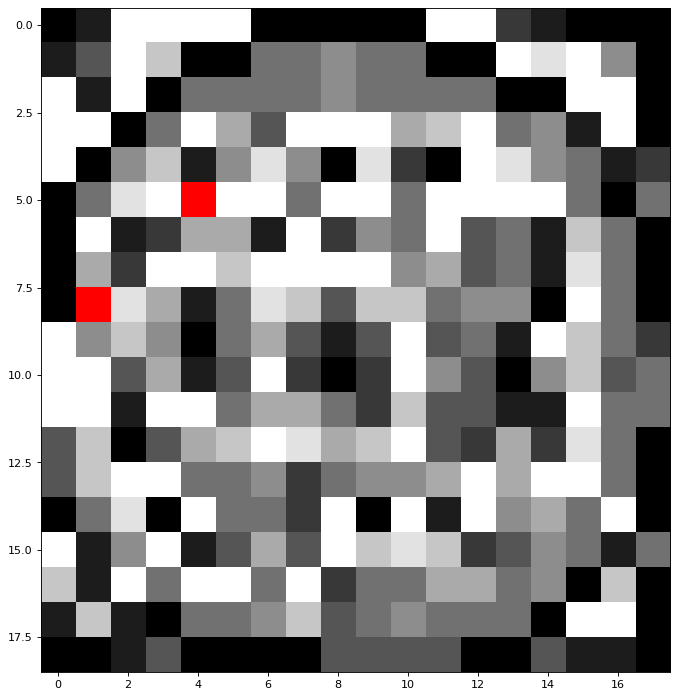

In [5]:
# Algorithm
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'

# Execution for the first image
main(single_exec=True)

### Variantes del operador LBP

Se contemplan las tres versiones del operador LBP.

### Utilización de la intensidad original de las imágenes

Dado que la intensidad original de las imágenes en escala de grises aporta información adicional que puede ser empleada por el clasificador ya que las imágenes se encuentran normalizadas y generalmente los vasos sanguíneos proporcionan una intensidad similar entre sí, se comprueba el efecto proporcionado por su utilización, es decir, se generan bases de datos tanto con esta información adicional como sin ella.

### Balanceado de los datos

Así mismo, debido a que en el conjunto de datos generado cada instancia es un píxel de la imagen, la clasificación de las instancias como vaso sanguíneo se encuentra en una proporción muy inferior, lo que podría provocar un sesgo inicial en el clasificador. Con la finalidad de comprobar si este hecho es perjudicial sobre el poder predictivo del clasificador se realiza en algunas bases de datos una selección aleatoria, es decir, un muestreo, de píxeles etiquetados de forma negativa, equilibrando la proporción al 50% con los representativos de vasos sanguíneos.

### Utilización de diferentes escalas

Dado que se desconoce en qué reducción de escala es posible que la información proporcionada deje de aportar valor debido a la pérdida de calidad de los datos en el procedimiento de reescalado, se prueban diferentes configuraciones. Se toman valores entre 3 y 6 escalas.

### Escala x2

Otra configuración que se ha considerado de interés es el reescalado al doble de dimensiones respecto a la imagen original.

## Clasificación para las diferentes configuraciones de parametría (Grid Search)

De esta forma, se ha definido un rango de parámetros entorno a los cuales se ha realizado el cálculo de las BBDD con la finalidad de comprobar los resultados proporcionados por la clasificación basada en cada una de ellas.

In [6]:
VALID_PARAMETERS = {
    'LBP_METHOD': ['riu2', 'default', 'riu'],
    'METHOD': ['get_pyramid_dataset'],
    'INTERPOLATION_ALGORITHM': ['nearest', 'lanczos', 'bicubic'],
    'BALANCE': [False, True],
    'N_SCALES': list(range(1, 7)),
    'GRAY_INTENSITY': [True, False],
    'X2SCALE': [False, True],
}

Para la definición y ejecución de la totalidad de las combinaciones de parametría en la generación de las bases de datos se emplea el siguiente código.

In [7]:
import PARAMETERS
from create_db import main
import itertools

dict_keys = list(VALID_PARAMETERS.keys())
for combination in itertools.product(*[VALID_PARAMETERS[k] for k in dict_keys]):
    print(combination)
    for i, v in enumerate(combination):
        setattr(PARAMETERS, dict_keys[i], v)
        PARAMETERS.FILE_EXTENSION = f"{PARAMETERS.LBP_METHOD}_{PARAMETERS.METHOD}_" \
                                    f"{PARAMETERS.INTERPOLATION_ALGORITHM}_balance-{PARAMETERS.BALANCE}_" \
                                    f"scales-{PARAMETERS.N_SCALES}_x2-{PARAMETERS.X2SCALE}" \
                                    f"_gray-intensity-{PARAMETERS.GRAY_INTENSITY}"
    #if not (PARAMETERS.N_SCALES == 1 and PARAMETERS.X2SCALE):
        # main()

('riu2', 'get_pyramid_dataset', 'nearest', False, 1, True, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 1, True, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 1, False, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 1, False, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 2, True, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 2, True, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 2, False, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 2, False, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 3, True, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 3, True, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 3, False, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 3, False, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 4, True, False)
('riu2', 'get_pyramid_dataset', 'nearest', False, 4, True, True)
('riu2', 'get_pyramid_dataset', 'nearest', False, 4, False, False)
('riu2', '

Con ello, los diferentes datasets son almacenados en ficheros comprimidos para ser utilizados posteriormente con un bucle similar en el que se lleva a cabo el proceso de clasificación.

In [8]:
from main import main
import pandas as pd
import os
from pathlib import Path

os.environ['GRID_SEARCH'] = 'TRUE'
skip_process = False

if skip_process:
    metrics = pd.read_csv('../Results/metrics.csv', index_col='Unnamed: 0')
else:
    metrics = pd.DataFrame(columns=[
                'LBP', 'Method', 'Interpolation', 'Balance', 'n_scales', 'x2', 'Gray Intensity',
                'Accuracy', 'F1 score', 'tn', 'fp', 'fn', 'tp'
            ])
    parent_path = '..'
    for filename in Path(f"{parent_path}/DB").glob('train_train_*'):
        PARAMETERS.FILE_EXTENSION = str(filename).replace('train_train_', '').split('/')[-1].replace('.zip', '').replace('.pkl', '')
        properties = PARAMETERS.FILE_EXTENSION.replace(
            'get_pyramid_dataset', 'get-pyramid-dataset').replace(
            'get_datasets_by_scale', 'get-dataset-by-scale').split('_')
        PARAMETERS.LBP_METHOD = properties[0]
        PARAMETERS.METHOD = properties[1].replace(
            'get-pyramid-dataset', 'get_pyramid_dataset').replace('get-dataset-by-scale', 'get_datasets_by_scale')
        PARAMETERS.INTERPOLATION_ALGORITHM = properties[2]
        PARAMETERS.BALANCE = properties[3].replace('balance-', '') == 'True'
        PARAMETERS.N_SCALES = int(properties[4].replace('scales-', ''))
        PARAMETERS.X2SCALE = properties[5].replace('x2-', '') == 'True'
        PARAMETERS.GRAY_INTENSITY = properties[6].replace('gray-intensity-', '') == 'True'
        metrics = metrics.append(pd.DataFrame(
            (
                PARAMETERS.LBP_METHOD,
                PARAMETERS.METHOD,
                PARAMETERS.INTERPOLATION_ALGORITHM,
                PARAMETERS.BALANCE,
                PARAMETERS.N_SCALES,
                PARAMETERS.X2SCALE,
                PARAMETERS.GRAY_INTENSITY
            ) + main(),
            index=[
                'LBP', 'Method', 'Interpolation', 'Balance', 'n_scales', 'x2', 'Gray Intensity',
                'Accuracy', 'F1 score', 'tn', 'fp', 'fn', 'tp'
            ]
        ).T, ignore_index=True)
metrics['Sensivity'] = metrics['tp'] / (metrics['tp'] + metrics['fn'])
metrics['Specificity'] = metrics['tn'] / (metrics['tn'] + metrics['fp'])
metrics.drop(columns=['tn', 'fp', 'fn', 'tp'], inplace=True)
metrics.head()

LBP               Method Interpolation Balance n_scales     x2  \
0      riu  get_pyramid_dataset       bicubic    True        6  False   
1      riu  get_pyramid_dataset       nearest   False        6   True   
2  default  get_pyramid_dataset       bicubic   False        4  False   
3     riu2  get_pyramid_dataset       lanczos    True        6   True   
4  default  get_pyramid_dataset       nearest   False        5   True   

  Gray Intensity Accuracy F1 score Sensivity Specificity  
0           True    0.756    0.452  0.784816    0.751481  
1          False    0.881    0.429  0.346753    0.960188  
2           True    0.894    0.547   0.49694    0.952634  
3           True    0.739    0.438  0.793351    0.730712  
4          False    0.879    0.472    0.4225    0.945789

## Análisis de los resultados obtenidos

A continuación, se obtienen una serie de estadísticas acerca del poder predictivo mostrado por cada parametría.

### Algoritmo de interpolación

In [9]:
metrics.groupby("Interpolation")["Accuracy"].describe()

count  unique    top  freq
Interpolation                            
bicubic        132.0    78.0  0.871   7.0
lanczos        132.0    78.0  0.879   8.0
nearest        132.0    77.0  0.871   9.0

In [10]:
metrics.groupby("Interpolation")["F1 score"].describe()

count  unique  top  freq
Interpolation                          
bicubic        132.0   105.0  0.0   5.0
lanczos        132.0   106.0  0.0   5.0
nearest        132.0   101.0  0.0   5.0

Se observa que los mejores resultados, y más estables, son los obtenidos con la interpolación bicúbica, con resultados muy similares para lanczos.

### Balanceado de los datos

In [11]:
metrics.groupby("Balance")["Accuracy"].describe()

count  unique    top  freq
Balance                            
False    198.0    31.0  0.871  22.0
True     198.0   104.0  0.754   6.0

In [12]:
metrics.groupby("Balance")["F1 score"].describe()

count  unique    top  freq
Balance                            
False    198.0   139.0  0.000  15.0
True     198.0   109.0  0.432   5.0

Como cabía esperar, se obtiene un mayor porcentaje de acierto a costa de una menor tasa para la categoría no predominante, los vasos sanguíneos cuando se realiza un balanceado. Sin embargo, al no realizarlo los resultados son muy dispares, como se puede observar en la desviación típica, con lo que en algunas combinaciones parece favorable el disponer de una mayor cantidad de datos a entrenar en el clasificador.

### Número de escalas

In [13]:
metrics.groupby("n_scales")["Accuracy"].describe()

count  unique    top  freq
n_scales                            
1          36.0    13.0  0.871   9.0
2          72.0    41.0  0.871  11.0
3          72.0    52.0  0.877   5.0
4          72.0    49.0  0.887   6.0
5          72.0    38.0  0.887   5.0
6          72.0    44.0  0.887   4.0

In [14]:
metrics.groupby("n_scales")["F1 score"].describe()

count  unique    top  freq
n_scales                            
1          36.0    11.0  0.000   9.0
2          72.0    59.0  0.000   6.0
3          72.0    61.0  0.371   3.0
4          72.0    59.0  0.443   4.0
5          72.0    53.0  0.447   4.0
6          72.0    56.0  0.452   2.0

En lo relativo al número de escalas, parece que la posibilidad de disponer de una mayor cantidad de datos siempre es favorable, siendo el efecto cada vez menos relevante a medida que la calidad de la información (menores escalas) es inferior.

### Utilización de la escala x2

In [15]:
metrics.groupby("x2")["Accuracy"].describe()

count  unique    top  freq
x2                               
False  216.0    91.0  0.871  15.0
True   180.0    97.0  0.879   7.0

In [16]:
metrics.groupby("x2")["F1 score"].describe()

count  unique    top  freq
x2                               
False  216.0   132.0  0.000  12.0
True   180.0   130.0  0.363   5.0

Aunque en la mayoría de combinaciones de parámetros no tiene un efecto positivo, se puede observar que para algunas permite aumentar la capacidad de identificación de los vasos sanguíneos, obteniendo unos valores F1 superiores.

### Intensidad original

In [17]:
metrics.groupby("Gray Intensity")["Accuracy"].describe()

count  unique    top  freq
Gray Intensity                            
False           198.0    88.0  0.871  22.0
True            198.0    84.0  0.892  10.0

In [18]:
metrics.groupby("Gray Intensity")["F1 score"].describe()

count  unique    top  freq
Gray Intensity                            
False           198.0   128.0  0.000  15.0
True            198.0   126.0  0.363   4.0

De nuevo, una mayor cantidad de información permite la obtención de unos mejores resultados.

### Versión del operador LBP

In [19]:
metrics.groupby("LBP")["Accuracy"].describe()

count  unique    top  freq
LBP                                
default  132.0    76.0  0.876   6.0
riu      132.0    66.0  0.887   8.0
riu2     132.0    70.0  0.871  11.0

In [20]:
metrics.groupby("LBP")["F1 score"].describe()

count  unique    top  freq
LBP                                
default  132.0    98.0  0.555   4.0
riu      132.0    99.0  0.282   3.0
riu2     132.0    91.0  0.000   9.0

El operador LBP que proporciona mejores resultados es el original, el que posee la información completa de las 256 categorías.

## Análisis de la parametría con mejor resultado

In [21]:
metrics.sort_values(by=['Accuracy'], ascending=False).head()

LBP               Method Interpolation Balance n_scales     x2  \
51       riu  get_pyramid_dataset       lanczos   False        4  False   
364      riu  get_pyramid_dataset       bicubic   False        4  False   
127  default  get_pyramid_dataset       lanczos   False        4  False   
296      riu  get_pyramid_dataset       lanczos   False        5  False   
2    default  get_pyramid_dataset       bicubic   False        4  False   

    Gray Intensity Accuracy F1 score Sensivity Specificity  
51            True    0.896    0.545  0.482924    0.957137  
364           True    0.895    0.541  0.482816    0.955491  
127           True    0.895    0.548  0.496124    0.953847  
296           True    0.894    0.546  0.493726    0.953436  
2             True    0.894    0.547   0.49694    0.952634

In [22]:
metrics.sort_values(by=['F1 score'], ascending=False).head()

LBP               Method Interpolation Balance n_scales    x2  \
255  default  get_pyramid_dataset       lanczos   False        5  True   
19   default  get_pyramid_dataset       bicubic   False        6  True   
155  default  get_pyramid_dataset       bicubic   False        5  True   
28   default  get_pyramid_dataset       lanczos   False        6  True   
386      riu  get_pyramid_dataset       bicubic   False        6  True   

    Gray Intensity Accuracy F1 score Sensivity Specificity  
255           True     0.89    0.555  0.532616    0.942795  
19            True    0.888    0.555  0.540597    0.939768  
155           True    0.889    0.555  0.536652    0.941252  
28            True    0.889    0.555  0.535898    0.941451  
386           True    0.891    0.548  0.512948    0.947167

Dado que el objetivo del proyecto es la determinación automática de la presencia de vasos sanguíneos, se toma como mejor resultado aquel que proporciona un mayor valor de *F1 score*, que aun proporcionando una mayor cantidad de falsas detecciones que aquellos con una preción superior, permite alcanzar mejor el objetivo definido.

In [23]:
metrics.sort_values(by=['F1 score'], ascending=False).iloc[0, :].to_frame().T

LBP               Method Interpolation Balance n_scales    x2  \
255  default  get_pyramid_dataset       lanczos   False        5  True   

    Gray Intensity Accuracy F1 score Sensivity Specificity  
255           True     0.89    0.555  0.532616    0.942795

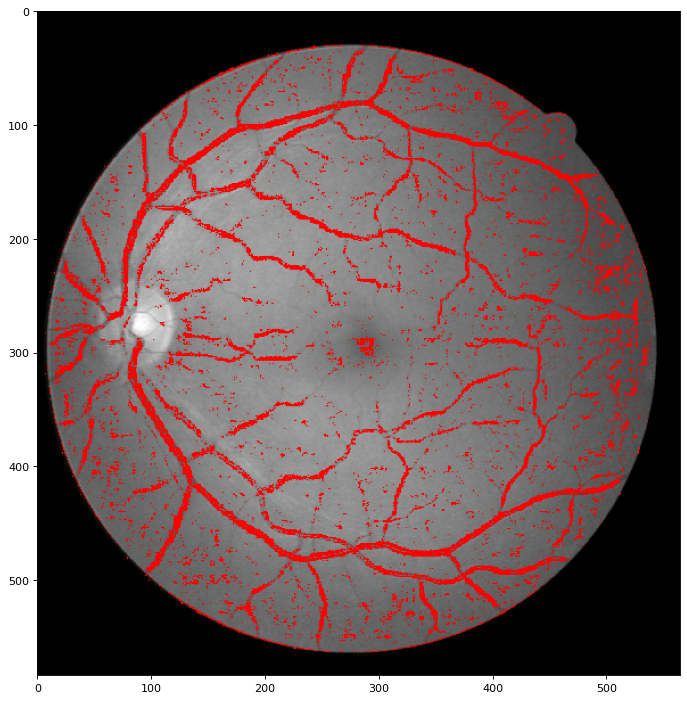

(0.89, 0.555, 1119612, 67933, 81868, 93294)

In [24]:
from main import main

PARAMETERS.LBP_METHOD = 'default'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 5
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.FILE_EXTENSION = f"{PARAMETERS.LBP_METHOD}_{PARAMETERS.METHOD}_{PARAMETERS.INTERPOLATION_ALGORITHM}_balance-{PARAMETERS.BALANCE}_scales-{PARAMETERS.N_SCALES}_x2-{PARAMETERS.X2SCALE}_gray-intensity-{PARAMETERS.GRAY_INTENSITY}"

PARAMETERS.PLOT = True

main(plot_once=True)

A continuación, se utiliza el clasificador LightGBM junto con la técnica conocida como GridSearch respecto a su parametría.

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066799 seconds.
You can set `force_col_wise=true` to remove the overhead.


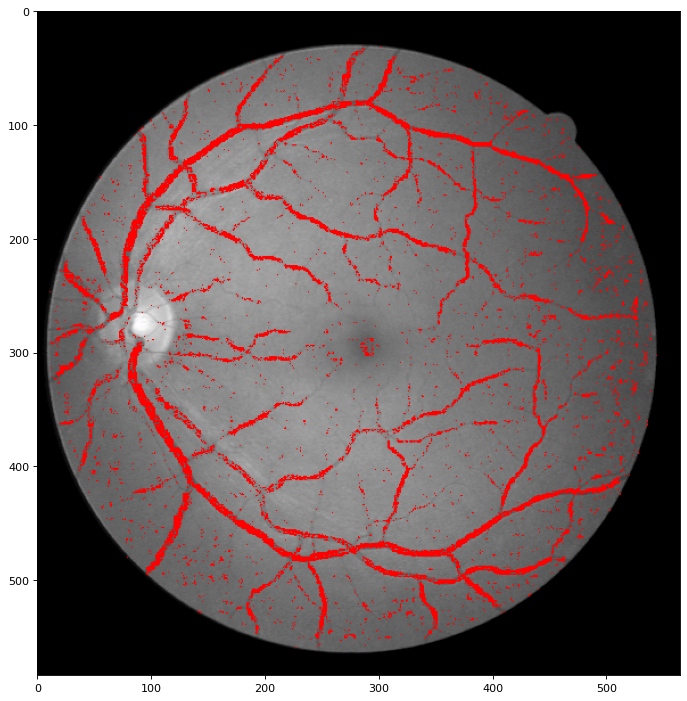

(0.907, 0.571, 1150839, 36706, 90501, 84661)

In [25]:
main(lgb=True, plot_once=True)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


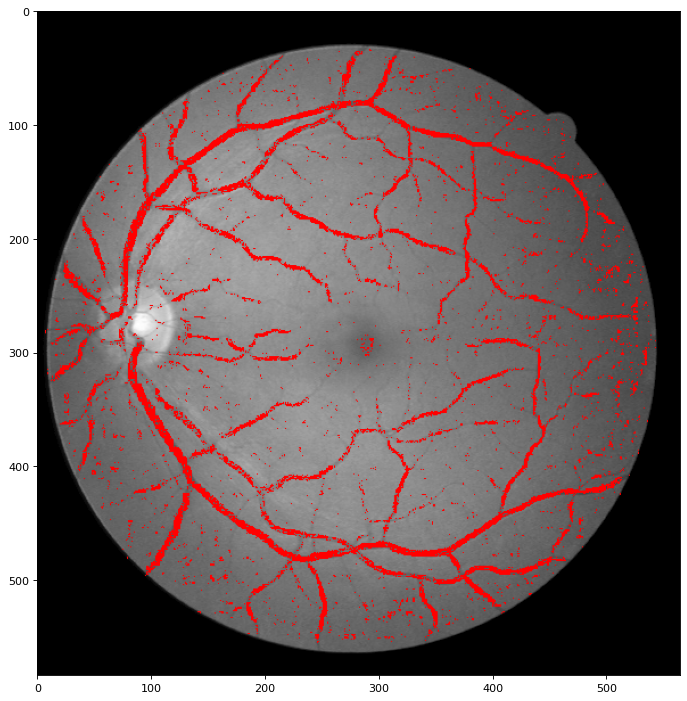

(0.907, 0.573, 1151420, 36125, 90313, 84849)

In [26]:
from main import *

"""
def main(lgb=False, plot_once=False):
    # Database unzip
    
    for i, lbp_operator in enumerate(VALID_PARAMETERS['LBP_METHOD']):
        PARAMETERS.LBP_METHOD = lbp_operator
        PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
    
        parent_path = '..'
        train_file_name = f"{parent_path}/DB/train_train_{PARAMETERS.FILE_EXTENSION}"
        with zipfile.ZipFile(f'{train_file_name}.zip', 'r') as zip_ref:
            zip_ref.extractall(f'{parent_path}/DB/')
        test_file_name = f"{parent_path}/DB/train_test_{PARAMETERS.FILE_EXTENSION}"
        with zipfile.ZipFile(f'{test_file_name}.zip', 'r') as zip_ref:
            zip_ref.extractall(f'{parent_path}/DB/')

        flag = True

        if i == 0:
            df_train = pd.read_pickle(f'{train_file_name}.pkl')
            os.remove(f'{train_file_name}.pkl')
            df_test = pd.read_pickle(f'{test_file_name}.pkl')
            os.remove(f'{test_file_name}.pkl')
            y_train = df_train.loc[:, 'label']
            y_test = df_test.loc[:, 'label']
            df_train.drop(columns=['label'], inplace=True)
            df_test.drop(columns=['label'], inplace=True)
            df_train.columns = list(map(lambda x: f"{PARAMETERS.LBP_METHOD}_{x}" if x != 'Original' else x,
                                        df_train.columns))
            df_test.columns = list(map(lambda x: f"{PARAMETERS.LBP_METHOD}_{x}" if x != 'Original' else x,
                                        df_test.columns))
        else:
            df_train_temp = pd.read_pickle(f'{train_file_name}.pkl')
            os.remove(f'{train_file_name}.pkl')
            df_test_temp = pd.read_pickle(f'{test_file_name}.pkl')
            os.remove(f'{test_file_name}.pkl')
            if PARAMETERS.GRAY_INTENSITY:
                df_train_temp.drop(columns=['label', 'Original'], inplace=True)
                df_test_temp.drop(columns=['label', 'Original'], inplace=True)
            df_train_temp.columns = list(map(lambda x: f"{PARAMETERS.LBP_METHOD}_{x}",
                                        df_train_temp.columns))
            df_test_temp.columns = list(map(lambda x: f"{PARAMETERS.LBP_METHOD}_{x}",
                                        df_test_temp.columns))
            df_train = pd.concat([df_train, df_train_temp], axis=1)
            df_test = pd.concat([df_test, df_test_temp], axis=1)

    for col in df_train.columns:
        df_train[col] = df_train[col].astype('category')
        df_test[col] = df_test[col].astype('category')
    if df_train.shape[1] > 0:
        clf = init_clf_and_fit(df_train, y_train, lgb)
        y_predicted = clf.predict(df_test)
    else:
        flag = False

    if PARAMETERS.PLOT and flag:
        label_predicted = np.array(y_predicted)
        preprocess = Preprocess(height=608, width=576)
        images_path = f'{parent_path}/dataset/training/images/'
        images = sorted(os.listdir(images_path))[14:]
        masks_path = f'{parent_path}/dataset/training/mask/'
        masks = sorted(os.listdir(masks_path))[14:]
        for image_path, mask_path in zip(images, masks):
            img = preprocess.read_img(images_path + image_path).ravel()
            mask = preprocess.read_img(masks_path + mask_path)
            img = img[mask.ravel() > 100]
            preprocess.plot_preprocess_with_label(img, label_predicted[:len(img)], mask)
            label_predicted = np.delete(label_predicted, np.arange(len(img)))
            if plot_once:
                break

    if flag:
        acc = accuracy_score(y_test, y_predicted)
        f1 = f1_score(y_test, y_predicted)
        if 'GRID_SEARCH' not in os.environ or os.environ['GRID_SEARCH'] != 'TRUE':
            print('Accuracy score: ' + str(acc) + '\n')
            print('F1 score: ' + str(f1) + '\n')
            print('Confusion matrix:\n')
            print_confusion_matrix(y_test, y_predicted)
        mat = confusion_matrix(y_test, y_predicted).ravel()
        return round(acc, 3), round(f1, 3), int(mat[0]), int(mat[1]), int(mat[2]), int(mat[3])
    else:
        return -1, -1, -1, -1, -1, -1
"""

main(lgb=True, plot_once=True, all_lbp=True)